In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_dir = './data'
data_orig = pd.read_csv(file_dir+'/high_diamond_ranked_10min.csv')

In [3]:
data_orig.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
data_orig

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [5]:
data_orig.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

## data features

- gameid : 게임 매치 ID (unique)
- blueWins : 블루팀 승패 여부 (1: 승 / 0: 패)
- blueWardsPlaced : 블루팀이 설치한 와드 수
- blueWardsDestroyed : 블루팀이 파괴한 와드 수
- blueFirstBlood : 블루팀이 최초킬을 달성했는지 여부 (1: 최초킬 / 0: X)
- blueKills : 블루팀의 킬 수
- blueDeaths : 블루팀의 데스 수
- blueAssits : 블루팀의 어시스트 수
- blueEliteMonsters : 블루팀이 처치한 에픽 몬스터 수 (전령, 용)
- blueDragons : 블루팀이 처치한 용 수
- blueHeralds : 블루팀이 처치한 전령 수
- blueTowersDestroyed : 블루팀이 파괴한 타워 수
- blueTotalGold : 블루팀이 획득한 총 골드
- blueAvgLevel : 블루팀의 평균 레벨
- blueTotalExperience : 블루팀의 총 경험치
- blueTotalMinionsKilled : 블루팀이 처치한 총 미니언 수
- blueTotalJungleMinionsKilled : 블루팀이 처치한 중립 미니언 수
- blueGoldDiff : 레드팀과의 총 골드량 차이
- blueExperienceDiff : 레드팀과의 총 경험치량 차이
- blueCSPerMin : 분당 블루팀이 처치한 중립+미니언 수수 
- blueGoldPerMin : 분당 블루팀의 골드 획득량


# 고려해볼 수 있는 문제

- 승리에 큰 영향을 주는 오브젝트를 확인하고 싶다
- 예상되는 팀의 승률
- 유리 할 때의 오브젝트 획득 정도
- 진영별 승리시 주요 요인 `ok`
- 용 획득과 승률과의 관계
- 정글 간 싸움으로 인한 게임 양상
- 카운터 정글로 인한 게임 양상
- 킬수 대비 어시스트 수에 따른 (경험치 or 다른 지표) 차이
- 킬수에 따른 경험치량 차이
- 와드설치와 킬 상관관계  - 정글의 개입 및 로밍의 성공에 대한 영향. 
- 와드설치-적 팀의파괴 와 총 골드량 차이 - 시야확보에 따른 그리디한 플레이.
- 타워 파괴와 에픽 몬스터 처치 관계
- 최초킬과 승패 여부
- 최초킬과 최종 10분간의 킬우세 관계
- (데이터에서 유추되는 맵 장악력
- 데이터에서 유추되는 게임 주도권)
- 
- **다이아 티어와 챌린저 티어와의 게임 양상 차이

여기서 주제별로 더 좁혀 나가보자

- 승리에 영향을 주는 오브젝트 -> feature selection 랜덤포레스트 시도 (스타트) / clustering
  - 유리할 때 오브젝트 획득 정도
    - 골드획득량 우세, 경험치 우세
  - 용 획득과 승률과의 관계
  - 전령 획득과 승률과의 관계
  - 타워 파괴와 에픽 몬스터 처치 관계
  - 진영 별 오브젝트 챙기는 빈도 (어느쪽이 더 유리한지)
- 정글 미니언 처치 수
  - 정글 간 우세 정도


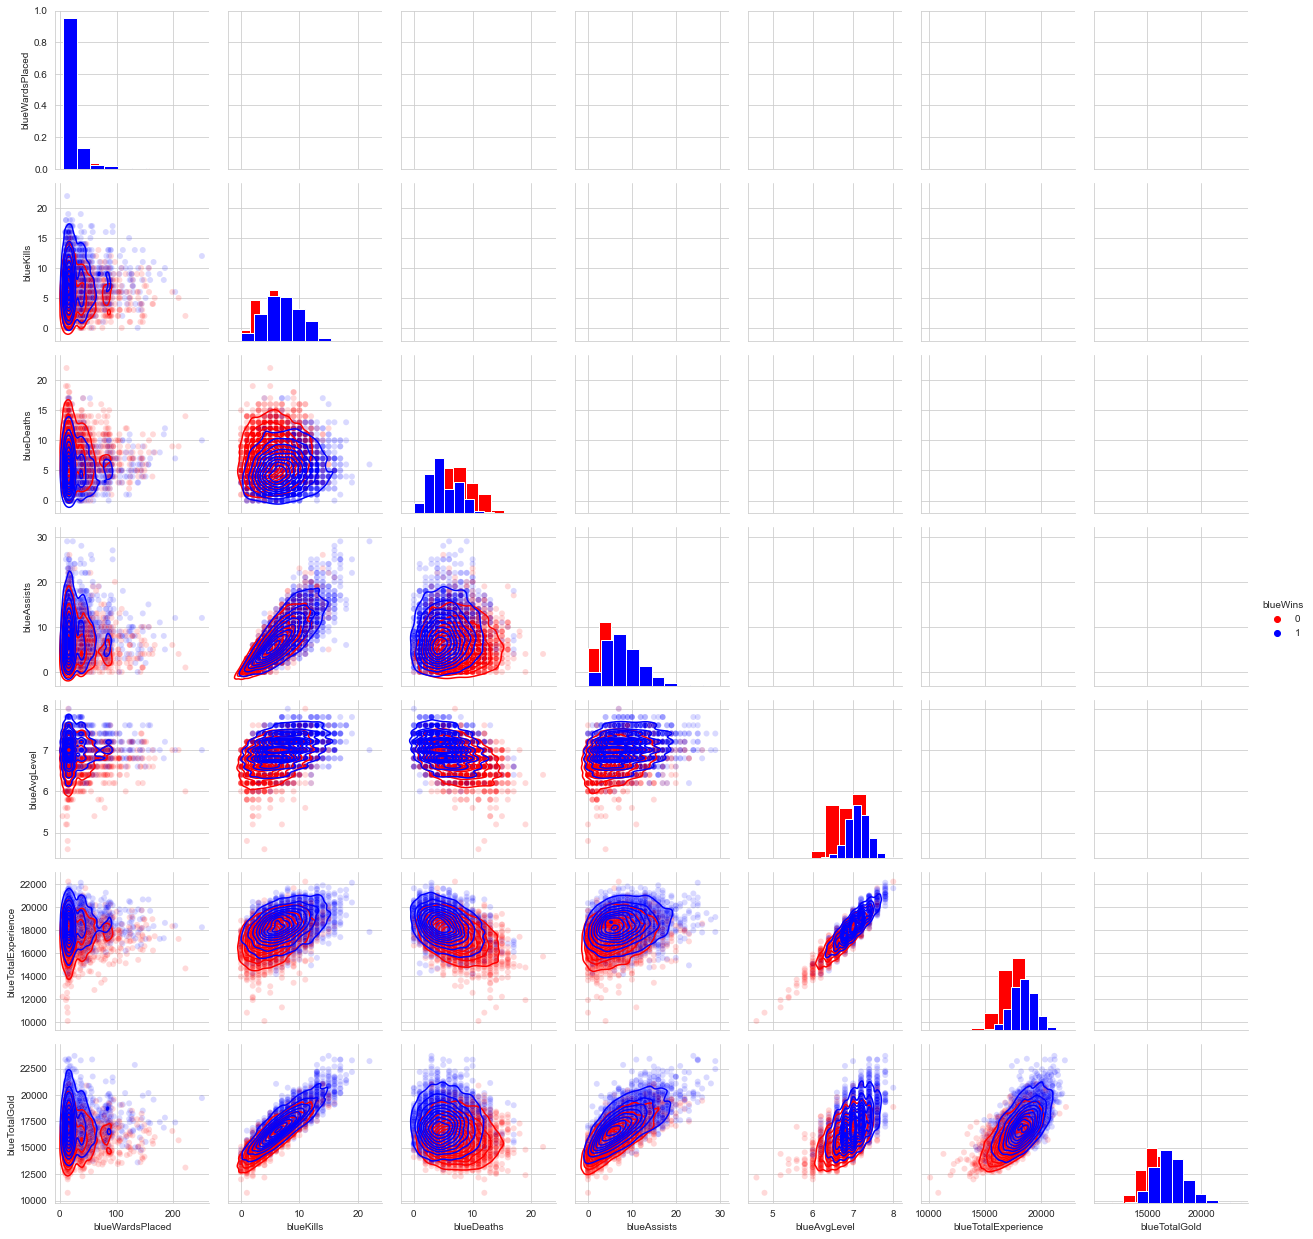

In [6]:
sns.set_style("whitegrid")
g = sns.PairGrid(data = data_orig, vars=['blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueAssists', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalGold'],
                 hue='blueWins', palette=sns.color_palette(['r', 'b']))
g.map_diag(plt.hist)
g.map_lower(sns.scatterplot, alpha=0.15)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.show()

In [7]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [8]:
data_orig.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [9]:
#list_column 내에 있는 str을 검색하여 pd_data의 칼럼을 추출
def find_columns(pd_data,list_column):
    if type(pd_data) == pd.core.frame.DataFrame:
        return pd_data.loc[:, [x for x in pd_data.columns if any((c in x) for c in list_column)]]
    else:
        return pd.dataFrame([])

#dict_new_name 에 따른 column명 변경
def rename_column(pd_data,dict_new_name):
    pd_data.rename(columns=dict_new_name,inplace=True)

In [10]:
#find_set 으로 origin 으로부터 칼럼 추출
find_set = ['gameId','blue']
data_blue = find_columns(data_orig,find_set)

find_set = ['gameId','red','Win']
data_red = find_columns(data_orig, find_set)

rename_column(data_red,{'blueWins':'redWins'})
data_red['redWins']=1-data_red['redWins']

In [11]:
data_red

,gameId,redWins,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,1,15,6,0,6,9,8,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,1,12,1,1,5,5,2,2,1,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,1,15,3,1,11,7,14,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,1,15,2,1,5,4,10,0,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,1,17,2,1,6,6,7,1,1,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,0,46,3,0,4,7,7,0,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,0,12,21,1,4,6,3,0,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,1,14,0,1,7,6,11,1,1,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,1,66,4,0,3,2,1,0,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [12]:
team = 'blue'
data_team = 'data_'+team
# (A+B)/C
def sum_divide(A,B,C):
    C=C.map(lambda x : x if x>=1 else 1)
    return round((A+B)/C,2)
    
#str 에 해당되는 변수 가져오기
def call_locals(str,local_dict):
    return local_dict[str]
#team 이름에 따른 kda 추출 local_dict는 지역변수
def make_kda(team,local_dict):
    data_team = call_locals('data_'+team,local_dict)
    return pd.DataFrame({'gameId':data_team['gameId'],
                         team+'Kda':sum_divide(data_team[team+'Kills'],data_team[team+'Assists'],data_team[team+'Deaths'])})




In [13]:
data_new = make_kda('red',locals())
#gameId 로 blue 와 red 의 kda merge
data_new = data_new.merge(make_kda('blue',locals()),how='right',on='gameId')

In [14]:
data_new['blueJungleDiff'] = data_blue['blueTotalJungleMinionsKilled']-data_red['redTotalJungleMinionsKilled']
data_new['redJungleDiff'] = -data_new['blueJungleDiff']

In [15]:
data_merged = data_orig.merge(data_new,how='right',on='gameId')
data_merged['redWins']=1-data_merged['blueWins']
data_merged

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,redKda,blueKda,blueJungleDiff,redJungleDiff,redWins
0,4519157822,0,28,2,1,9,6,11,0,0,...,55,-643,8,19.7,1656.7,1.56,3.33,-19,19,1
1,4523371949,0,12,1,0,5,5,5,0,0,...,52,2908,1173,24.0,1762.0,1.40,2.00,-9,9,1
2,4521474530,0,15,0,0,7,11,4,1,1,...,28,1172,1033,20.3,1728.5,3.57,1.00,18,-18,1
3,4524384067,0,43,1,0,4,5,5,1,0,...,47,1321,7,23.5,1647.8,3.75,1.80,8,-8,1
4,4436033771,0,75,4,0,6,6,6,0,0,...,67,1004,-230,22.5,1740.4,2.17,2.00,-10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,34,-2519,-2469,22.9,1524.6,1.57,3.00,35,-35,0
9875,4527797466,1,54,0,0,6,4,8,1,1,...,56,-782,-888,20.6,1545.6,1.17,3.50,-8,8,0
9876,4527713716,0,23,1,0,6,7,5,0,0,...,60,2416,1877,26.1,1831.9,3.00,1.57,-15,15,1
9877,4527628313,0,14,4,1,2,3,3,1,1,...,40,839,1085,24.7,1529.8,2.00,1.67,8,-8,1


In [16]:
#순서변경
data_merged = data_merged[['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueKda',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueJungleDiff', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWins', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redKda',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redJungleDiff', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'
       ]]

In [17]:
#gameId 제거
data_rf = data_merged.drop('gameId', axis=1)

#팀별로 구분
data_rf_blue = find_columns(data_rf,['blue'])
data_rf_red = find_columns(data_rf,['red'])

In [18]:
data_rf_red

,redWins,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redKda,redEliteMonsters,redDragons,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redJungleDiff,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,1,15,6,0,6,9,8,1.56,0,0,...,16567,6.8,17047,197,55,19,-643,8,19.7,1656.7
1,1,12,1,1,5,5,2,1.40,2,1,...,17620,6.8,17438,240,52,9,2908,1173,24.0,1762.0
2,1,15,3,1,11,7,14,3.57,0,0,...,17285,6.8,17254,203,28,-18,1172,1033,20.3,1728.5
3,1,15,2,1,5,4,10,3.75,0,0,...,16478,7.0,17961,235,47,-8,1321,7,23.5,1647.8
4,1,17,2,1,6,6,7,2.17,1,1,...,17404,7.0,18313,225,67,10,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,0,46,3,0,4,7,7,1.57,0,0,...,15246,6.8,16498,229,34,-35,-2519,-2469,22.9,1524.6
9875,0,12,21,1,4,6,3,1.17,0,0,...,15456,7.0,18367,206,56,8,-782,-888,20.6,1545.6
9876,1,14,0,1,7,6,11,3.00,1,1,...,18319,7.4,19909,261,60,15,2416,1877,26.1,1831.9
9877,1,66,4,0,3,2,1,2.00,0,0,...,15298,7.2,18314,247,40,-8,839,1085,24.7,1529.8


# 랜덤 포레스트 (feature selection)

In [19]:
blue_train = data_rf_blue.iloc[:, 1:]
blue_target = data_rf_blue.iloc[:, 0]

In [20]:
blue_train

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueKda,blueEliteMonsters,blueDragons,blueHeralds,...,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueJungleDiff,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,28,2,1,9,6,11,3.33,0,0,0,...,17210,6.6,17039,195,36,-19,643,-8,19.5,1721.0
1,12,1,0,5,5,5,2.00,0,0,0,...,14712,6.6,16265,174,43,-9,-2908,-1173,17.4,1471.2
2,15,0,0,7,11,4,1.00,1,1,0,...,16113,6.4,16221,186,46,18,-1172,-1033,18.6,1611.3
3,43,1,0,4,5,5,1.80,1,0,1,...,15157,7.0,17954,201,55,8,-1321,-7,20.1,1515.7
4,75,4,0,6,6,6,2.00,0,0,0,...,16400,7.0,18543,210,57,-10,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,17,2,1,7,4,5,3.00,1,1,0,...,17765,7.2,18967,211,69,35,2519,2469,21.1,1776.5
9875,54,0,0,6,4,8,3.50,1,1,0,...,16238,7.2,19255,233,48,-8,782,888,23.3,1623.8
9876,23,1,0,6,7,5,1.57,0,0,0,...,15903,7.0,18032,210,45,-15,-2416,-1877,21.0,1590.3
9877,14,4,1,2,3,3,1.67,1,1,0,...,14459,6.6,17229,224,48,8,-839,-1085,22.4,1445.9


In [21]:
blue_train.max()

blueWardsPlaced                   250.0
blueWardsDestroyed                 27.0
blueFirstBlood                      1.0
blueKills                          22.0
blueDeaths                         22.0
blueAssists                        29.0
blueKda                            40.0
blueEliteMonsters                   2.0
blueDragons                         1.0
blueHeralds                         1.0
blueTowersDestroyed                 4.0
blueTotalGold                   23701.0
blueAvgLevel                        8.0
blueTotalExperience             22224.0
blueTotalMinionsKilled            283.0
blueTotalJungleMinionsKilled       92.0
blueJungleDiff                     64.0
blueGoldDiff                    11467.0
blueExperienceDiff               8348.0
blueCSPerMin                       28.3
blueGoldPerMin                   2370.1
dtype: float64

In [22]:
# # MinMaxScaler

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(blue_train)
# blue_minmax= scaler.transform(blue_train)

In [23]:
# # 그리드 서치 함수
# from sklearn.model_selection import GridSearchCV

# def my_GridSearch(model, x, y, param_grid, verbose=2, n_jobs=5):
#     # GridSearchCV 모델로 초기화
#     grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
#                               cv=5, verbose=verbose, n_jobs=n_jobs)
    
#     # 모델 fitting
#     grid_model.fit(x, y)

#     # 결과value 저장
#     params = grid_model.cv_results_['params']
#     score = grid_model.cv_results_['mean_test_score']
    
#     # 데이터 프레임 생성
#     results = pd.DataFrame(params)
#     results['score'] = score
    
#     # RMSLE 값 계산 후 정렬
#     results['RMSLE'] = np.sqrt(-1 * results['score'])
#     results = results.sort_values('RMSLE')

#     return results

In [24]:
#blue_train[[x for x in blue_train.columns if blue_train[x].dtypes=='float64']].astype('float32',copy=False)
for x in blue_train.columns:
    if blue_train[x].dtypes=='float64':
        blue_train = blue_train.astype({x :'float32'})
        

In [25]:
blue_train.dtypes

blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueKda                         float32
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float32
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueJungleDiff                    int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float32
blueGoldPerMin                  float32
dtype: object

In [26]:
# blue_train = blue_train.astype('float32')

In [27]:
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [10, 15, 20],
#     'num_iterations' : [1000],
#     'n_jobs' = -1,
    
# }

# model = RandomForestClassifier(random_state=random_state)
# my_GridSearch(model, blue_train, blue_target, )

In [97]:
# 블루팀 랜덤포레스트

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(blue_train, blue_target, random_state=random_state)
forest = RandomForestClassifier(n_estimators=1000, random_state=random_state, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [30]:
X_train

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueKda,blueEliteMonsters,blueDragons,blueHeralds,...,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueJungleDiff,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
4321,13,1,1,3,8,2,0.62,0,0,0,...,15404,6.8,17439,240,56,-20,-3096,-3752,24.000000,1540.400024
6745,16,3,1,6,5,6,2.40,0,0,0,...,16518,7.2,19187,223,56,12,51,140,22.299999,1651.800049
5544,14,7,0,6,6,9,2.50,1,1,0,...,18409,6.8,18255,212,60,0,225,-216,21.200001,1840.900024
6990,28,1,1,12,7,13,3.57,0,0,0,...,19146,7.4,19236,214,55,5,2994,2952,21.400000,1914.599976
8785,16,4,0,3,6,2,0.83,1,0,1,...,15524,6.6,17326,217,58,-12,-645,-1495,21.700001,1552.400024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,21,4,1,11,9,13,2.67,1,1,0,...,19236,7.4,20585,231,48,8,2249,2480,23.100000,1923.599976
5191,12,1,1,6,8,5,1.38,0,0,0,...,16560,7.0,18074,203,65,13,-407,-1257,20.299999,1656.000000
5390,25,2,0,11,5,10,4.20,1,0,1,...,18888,7.0,18915,204,44,-8,2840,1792,20.400000,1888.800049
860,16,6,1,4,5,5,1.80,0,0,0,...,15717,6.8,17679,224,44,-31,-527,-208,22.400000,1571.699951


In [31]:
print(f'훈련 세트 정확도 : {forest.score(X_train, y_train) :.3f}')
print(f'테스트 세트 정확도 : {forest.score(X_test, y_test) :.3f}')

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.718


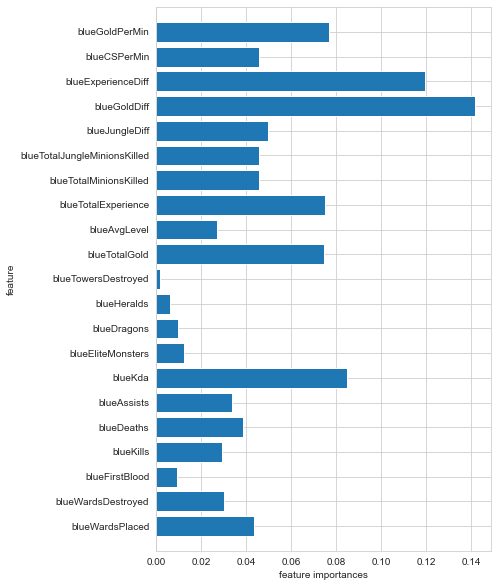

In [32]:
%matplotlib inline

plt.subplots(figsize=(6,10))

n_features = blue_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), blue_train.columns)
plt.xlabel("feature importances")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.show()

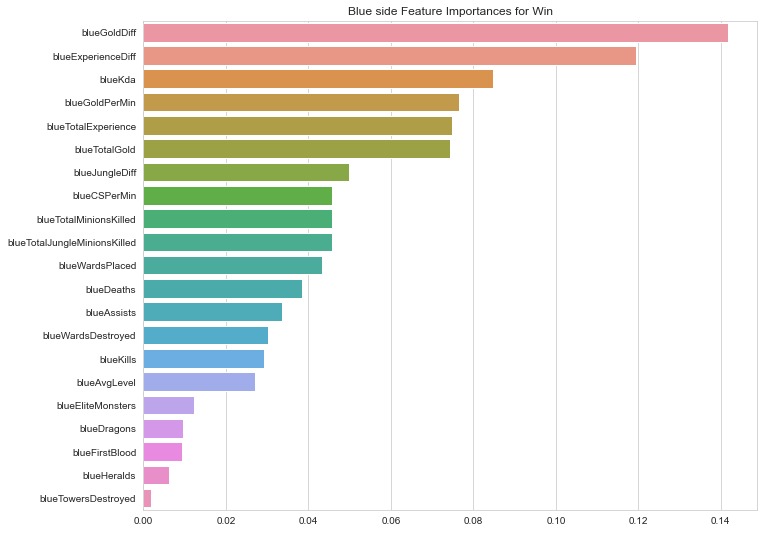

In [33]:
%matplotlib inline

blue_importances_values = forest.feature_importances_
blue_importances = pd.Series(blue_importances_values, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(11,9))
plt.title('Blue side Feature Importances for Win')
sns.barplot(x=blue_importances, y=blue_importances.index)
plt.show()

# 같은 KDA 일 때에도, 골드 지표는 얼마나 차이가 날까?

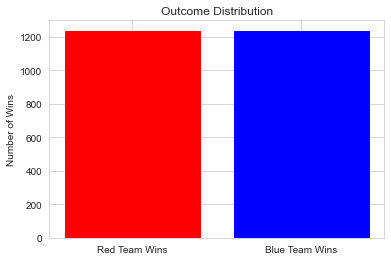

1234
1236


In [98]:
labels = ['Red Team Wins', 'Blue Team Wins']
red_wins = len(y_test[y_test==0])
blue_wins = len(y_test[y_test==1])
wins = (red_wins,blue_wins)
fig = plt.figure()
barPlot = plt.bar(labels,wins)
plt.ylabel('Number of Wins')
plt.title('Outcome Distribution')
barPlot[0].set_color('red')
barPlot[1].set_color('blue')
plt.show()

print(len(y_test[y_test==1]))
print(len(y_test[y_test==0]))

In [35]:
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(red_train, red_target, random_state=random_state)
forest = RandomForestClassifier(n_estimators=1000, random_state=random_state, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [36]:
print(f'훈련 세트 정확도 : {forest.score(X_train, y_train) :.3f}')
print(f'테스트 세트 정확도 : {forest.score(X_test, y_test) :.3f}')

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.719


In [115]:
# 테스트 셋을 전부 승만 뒀을 때의 정확도
new_test = pd.concat([X_test,y_test], axis=1)
new_test

only_blue_wins = new_test[new_test['blueWins'] == 1]
only_blue_wins_target = only_blue_wins['blueWins']
only_blue_wins_test = only_blue_wins.drop(['blueWins'], axis=1)

print(f'테스트 세트 정확도 : {forest.score(only_blue_wins_test, only_blue_wins_target) :.3f}')

테스트 세트 정확도 : 0.710


In [34]:
red_train = data_rf_red.iloc[:, 1:]
red_target = data_rf_red.iloc[:, 0]

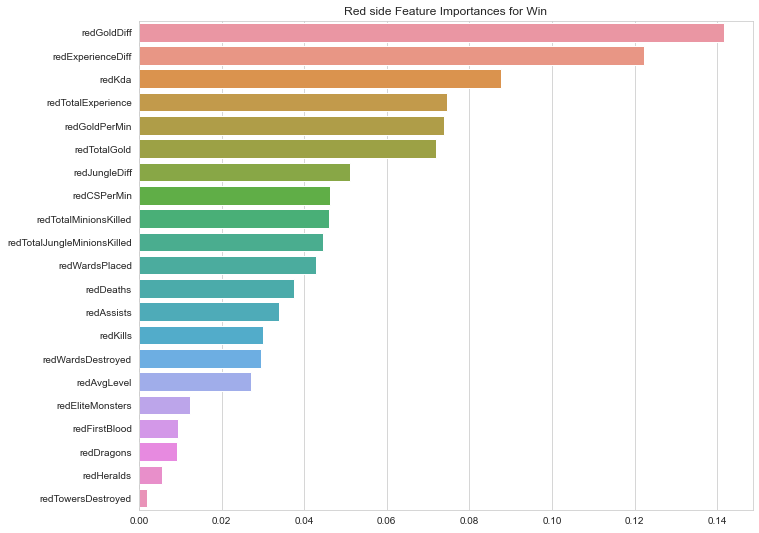

In [37]:
%matplotlib inline

red_importances_values = forest.feature_importances_
red_importances = pd.Series(red_importances_values, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(11,9))
plt.title('Red side Feature Importances for Win')
sns.barplot(x=red_importances, y=red_importances.index)
plt.show()

블루 진영과 레드 진영 모두 비슷한 feature importance 추세가 보인다.   
총 골드량 차이와 총 경험치 차이가 팀 승패를 결정 짓는 데에 절대적인 지표로 볼 수 있다.   
여기서 주목할 점은, 상대 팀과의 정글 몬스터 처치 수 차이 또한 중요하게 작용하는 것으로 보인다.   
즉, 적 정글러보다 성장을 더 잘 하거나 카운터 정글링을 통해 차이를 벌리는 것이 2020년도 10시즌의 대표적인 경향이다.   
실제로, 솔랭 유저였던 본인의 경험 및 프로 씬에서의 정글러 성장의 중요성을 엿볼 수 있는 대목이다.   

 - 패치 내역 인용해서 올리기
 - 전령 혹은 용 처치에 따른 골드 차이 그래프

AttributeError: 'PairGrid' object has no attribute 'set_title'

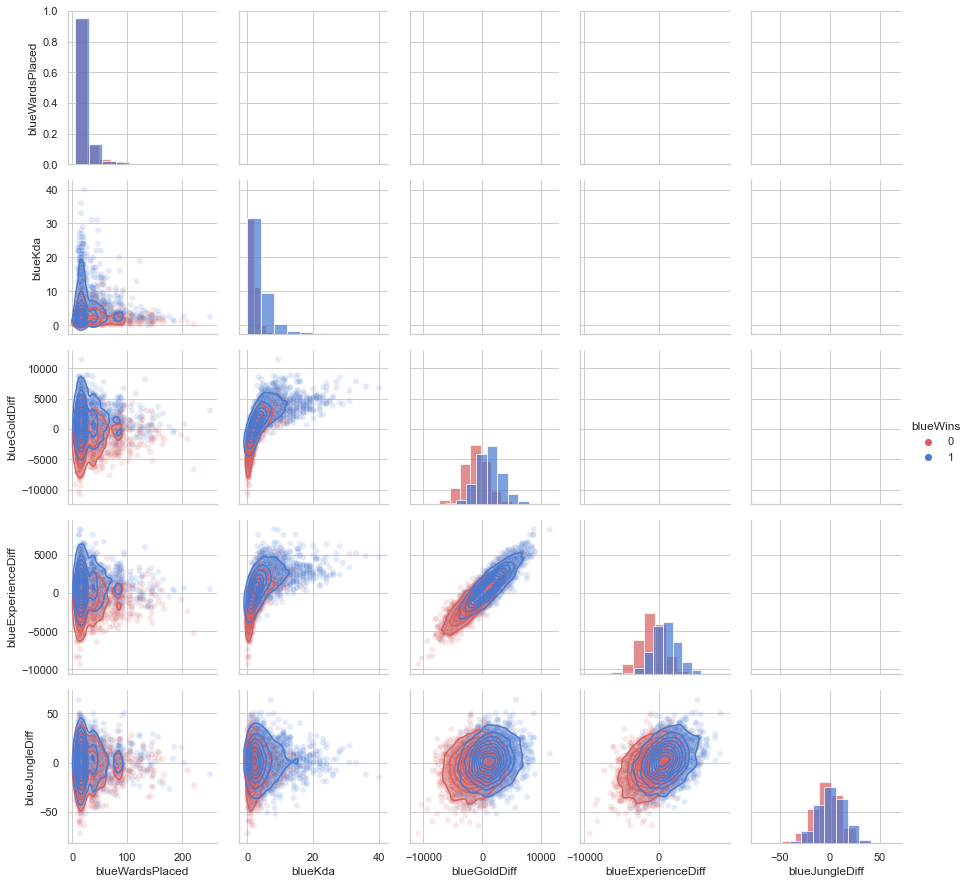

In [161]:
sns.set_color_codes("muted")

sns.set_style("whitegrid")
g = sns.PairGrid(data = data_rf_blue, vars=['blueWardsPlaced', 'blueKda', 'blueGoldDiff', 'blueExperienceDiff', 'blueJungleDiff'],
                 hue='blueWins', palette=sns.color_palette(['r', 'b'])) # 연한 색으로 변경 예정
g.map_diag(plt.hist, alpha=0.7)
g.map_lower(sns.scatterplot, alpha=0.15)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.show()

- 와드을 박을 수록 정글 차이가 적어지는 것으로 보인다.
    - 보통 초반 와드를 박는 이유는 정글 동선을 확인하기 위함이다.
    - 정글 개입으로 인해 게임이 기울어지는 것을 막아주는 것으로 보인다.

In [39]:
data_rf_blue.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueKda',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueJungleDiff', 'blueGoldDiff',
       'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin'],
      dtype='object')

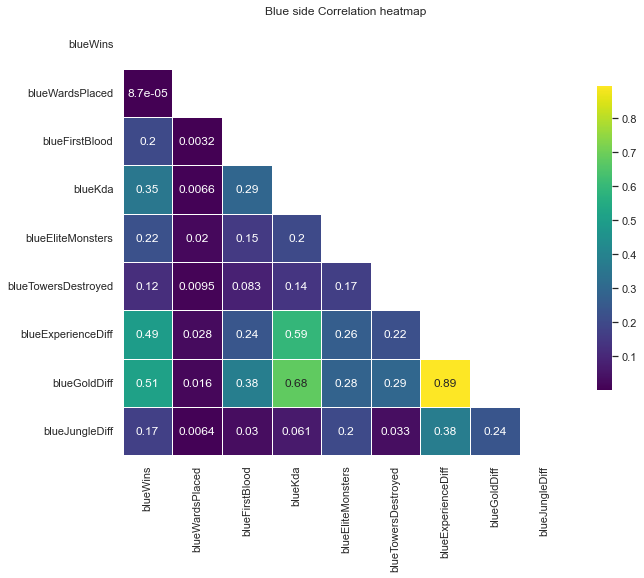

In [162]:
# 블루팀 feature 상관관계표

blue_hm = data_rf_blue[['blueWins', 'blueWardsPlaced', 'blueFirstBlood', 'blueKda', 'blueEliteMonsters', 
                        'blueTowersDestroyed', 'blueExperienceDiff', 'blueGoldDiff', 'blueJungleDiff']]

plt.subplots(figsize=(10,8))

mask = np.zeros_like(blue_hm.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(blue_hm.corr(), 
            cmap = 'viridis',
            mask=mask,
            annot = True,   # 실제 값을 표시한다
            cbar_kws={"shrink": .7},
            linewidths=.5,  # 경계면 실선으로 구분하기
           )  
plt.title('Blue side Correlation heatmap')
plt.show()

# 히트맵에 숫자 적어넣기

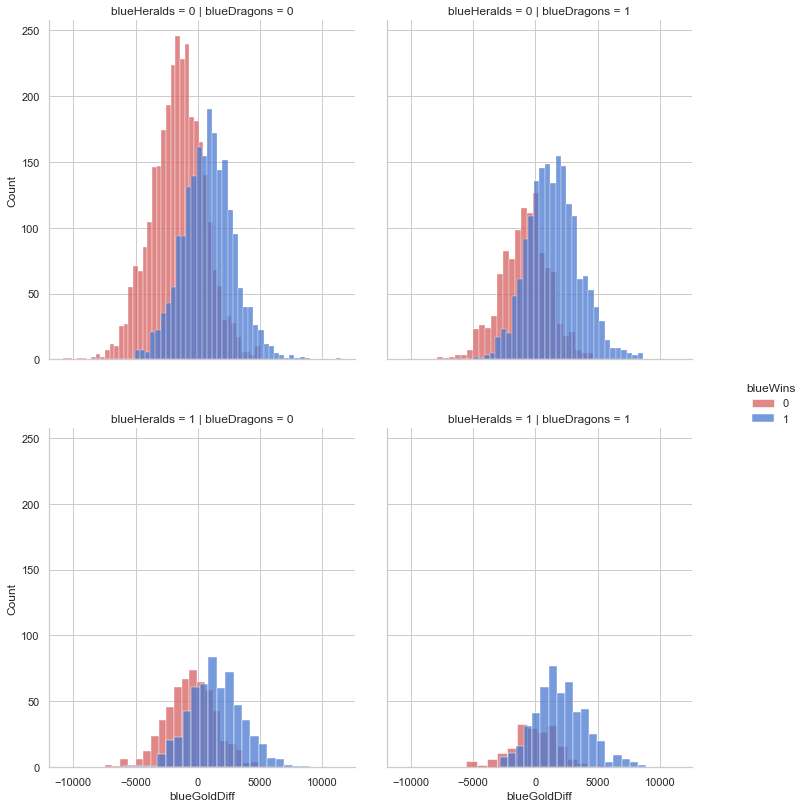

In [185]:
facet = sns.FacetGrid(data_rf_blue, col = 'blueDragons', row = 'blueHeralds', hue='blueWins', palette=sns.color_palette(['r', 'b']))
facet = facet.map(sns.histplot,'blueGoldDiff')
facet.add_legend()
facet.fig.set_size_inches(12,12.5)
plt.show()

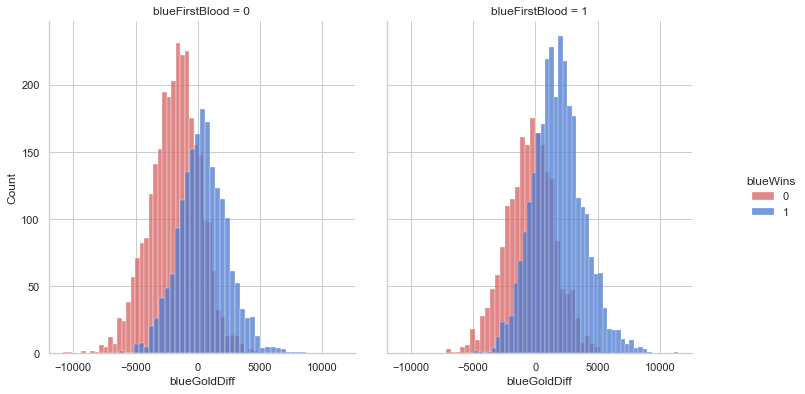

In [187]:
facet = sns.FacetGrid(data_rf_blue, col = 'blueFirstBlood', hue='blueWins', palette=sns.color_palette(['r', 'b']))
facet = facet.map(sns.histplot,'blueGoldDiff')
facet.add_legend()
facet.fig.set_size_inches(12,7)
plt.show()

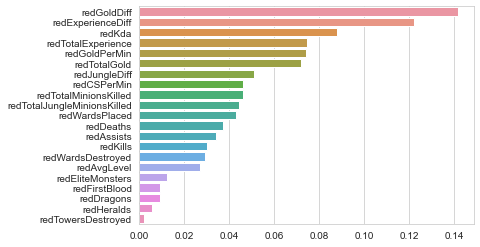

In [41]:
bar_plot_data = pd.Series(forest.feature_importances_,index = X_train.columns).sort_values(ascending=False)
sns.barplot(x=bar_plot_data, y=bar_plot_data.index)
plt.show()

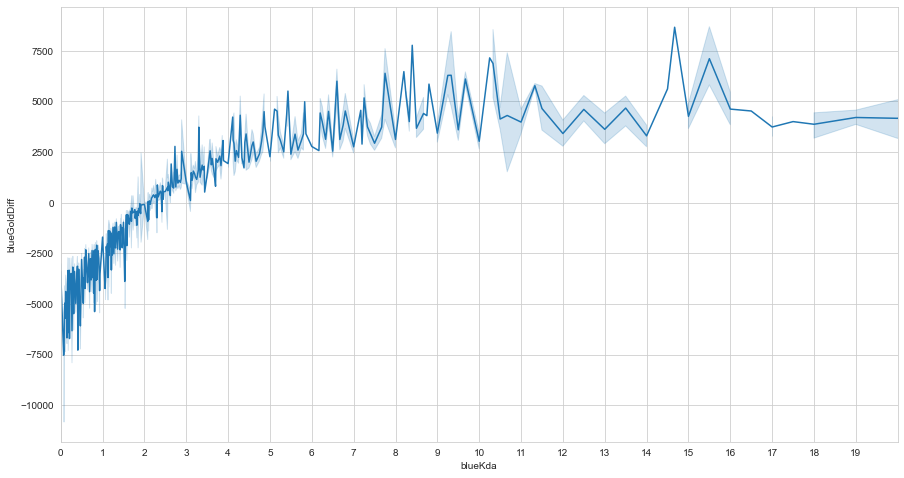

In [43]:
plt.figure(figsize=((15,8)))
data_show = data_rf_blue[['blueGoldDiff','blueKda','blueDeaths']]
#data_show['blueKda'].map(lambda x : x if x>1 else data_show['blueDeaths'] )
sns.lineplot(data = data_show,x='blueKda',y='blueGoldDiff')
plt.xlim([0,20])
plt.xticks(np.arange(0,20))
plt.show()

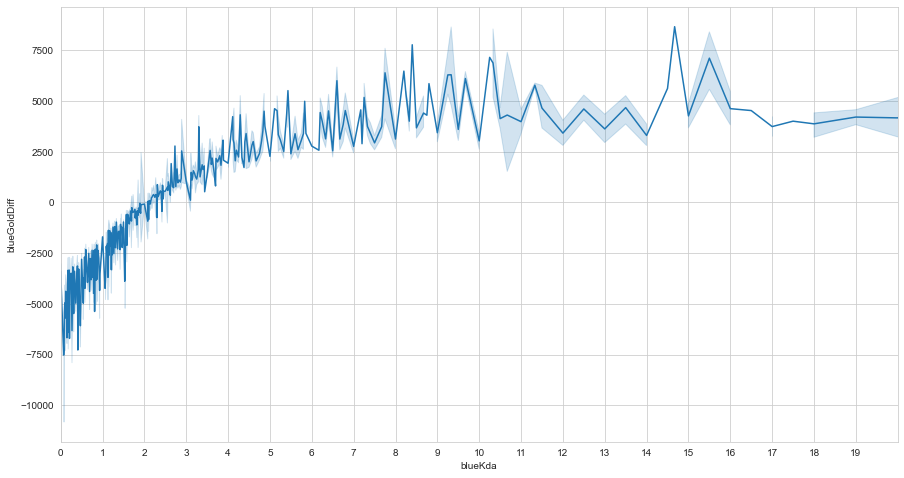

In [67]:
plt.figure(figsize=((15,8)))
data_show = data_rf_blue[['blueGoldDiff','blueKda','blueDeaths']]
data_show['blueKda'].map(lambda x : x if x>1 else data_show['blueDeaths'] )
sns.lineplot(data = data_show,x='blueKda',y='blueGoldDiff')
plt.xlim([0,20])
plt.xticks(np.arange(0,20))
plt.show()
#승리시 ,패배시 그래프 추가하기

# 챌린저 데이터

In [46]:
chal_orig = pd.read_csv(file_dir+'/Challenger_Ranked_Games_10minute.csv')

In [47]:
chal_orig

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,14870,2889,32,6.4,199,53,0,3,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,0
1,4247155821,1,14497,2617,33,6.6,229,44,0,2,...,[],0,0,0,0,0,0,[],0,0
2,4243963257,0,15617,1757,34,6.8,223,39,0,3,...,['BOT_LANE'],1,0,0,1,0,1,['FIRE_DRAGON'],1,1
3,4241678498,0,15684,1439,35,7.0,251,64,0,3,...,[],0,0,0,0,0,0,[],0,0
4,4241538868,1,17472,3512,35,7.0,257,46,0,7,...,[],0,0,0,0,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,4143231833,0,16762,5072,36,7.2,206,52,0,7,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,1
26405,4157911901,0,35765,1440,39,7.8,191,16,0,18,...,[],3,1,0,2,0,0,[],0,0
26406,3764171638,0,15712,4137,34,6.8,218,55,0,3,...,[],0,0,0,0,0,0,[],0,0
26407,4110201724,1,15850,3220,33,6.6,193,48,0,6,...,[],0,0,0,0,0,0,[],0,0


In [49]:
data_chal_orig.columns

Index(['gameId', 'blueWins', 'blueTotalGolds', 'blueCurrentGolds',
       'blueTotalLevel', 'blueAvgLevel', 'blueTotalMinionKills',
       'blueTotalJungleMinionKills', 'blueFirstBlood', 'blueKill', 'blueDeath',
       'blueAssist', 'blueWardPlaced', 'blueWardKills', 'blueFirstTower',
       'blueFirstInhibitor', 'blueFirstTowerLane', 'blueTowerKills',
       'blueMidTowerKills', 'blueTopTowerKills', 'blueBotTowerKills',
       'blueInhibitor', 'blueFirstDragon', 'blueDragnoType', 'blueDragon',
       'blueRiftHeralds', 'redWins', 'redTotalGolds', 'redCurrentGolds',
       'redTotalLevel', 'redAvgLevel', 'redTotalMinionKills',
       'redTotalJungleMinionKills', 'redFirstBlood', 'redKill', 'redDeath',
       'redAssist', 'redWardPlaced', 'redWardKills', 'redFirstTower',
       'redFirstInhibitor', 'redFirstTowerLane', 'redTowerKills',
       'redMidTowerKills', 'redTopTowerKills', 'redBotTowerKills',
       'redInhibitor', 'redFirstDragon', 'redDragnoType', 'redDragon',
       'redRift

In [50]:
data_chal_orig['redDragnoType'].unique()

array(["['WATER_DRAGON']", '[]', "['FIRE_DRAGON']", "['EARTH_DRAGON']",
       "['AIR_DRAGON']", "['EARTH_DRAGON', 'WATER_DRAGON']",
       "['WATER_DRAGON', 'AIR_DRAGON']",
       "['FIRE_DRAGON', 'EARTH_DRAGON']",
       "['FIRE_DRAGON', 'WATER_DRAGON']",
       "['EARTH_DRAGON', 'FIRE_DRAGON']",
       "['EARTH_DRAGON', 'AIR_DRAGON']", "['AIR_DRAGON', 'EARTH_DRAGON']",
       "['WATER_DRAGON', 'EARTH_DRAGON']",
       "['AIR_DRAGON', 'WATER_DRAGON']",
       "['WATER_DRAGON', 'FIRE_DRAGON']", "['ELDER_DRAGON']",
       "['AIR_DRAGON', 'FIRE_DRAGON']", "['FIRE_DRAGON', 'AIR_DRAGON']",
       "['EARTH_DRAGON', 'AIR_DRAGON', 'WATER_DRAGON']"], dtype=object)

In [51]:
data_chal_orig.dtypes

gameId                          int64
blueWins                        int64
blueTotalGolds                  int64
blueCurrentGolds                int64
blueTotalLevel                  int64
blueAvgLevel                  float64
blueTotalMinionKills            int64
blueTotalJungleMinionKills      int64
blueFirstBlood                  int64
blueKill                        int64
blueDeath                       int64
blueAssist                      int64
blueWardPlaced                  int64
blueWardKills                   int64
blueFirstTower                  int64
blueFirstInhibitor              int64
blueFirstTowerLane             object
blueTowerKills                  int64
blueMidTowerKills               int64
blueTopTowerKills               int64
blueBotTowerKills               int64
blueInhibitor                   int64
blueFirstDragon                 int64
blueDragnoType                 object
blueDragon                      int64
blueRiftHeralds                 int64
redWins     

In [52]:
eval_test = eval(data_chal_orig['blueFirstTowerLane'][26405])

In [53]:
def distribute_tower(str_list):
    if not str_list:
        return 0
    for val in str_list:
        if val =='BOT_LANE':
            return 1
        elif val == 'MID_LANE':
            return 2
        elif val == 'TOP_LANE':
            return 3
        else:
            return 4
#def distribute_dragon(str):
#    return {'':0,'WATER_DRAGON':1,'FIRE_DRAGON':2,'EARTH_DRAGON':3,'WIND_DRAGON':4}[str]

#data_chal_orig['redDragnoType'].map(lambda x : (distribute_dragon(y) for y in x))
#data_chal_orig['blueDragnoType'].map(lambda x : (distribute_dragon(y) for y in x))

data_chal_orig['redFirstTowerLane'] = data_chal_orig['redFirstTowerLane'].map(lambda x : distribute_tower(eval(x)))
data_chal_orig['blueFirstTowerLane'] = data_chal_orig['blueFirstTowerLane'].map(lambda x : distribute_tower(eval(x)))


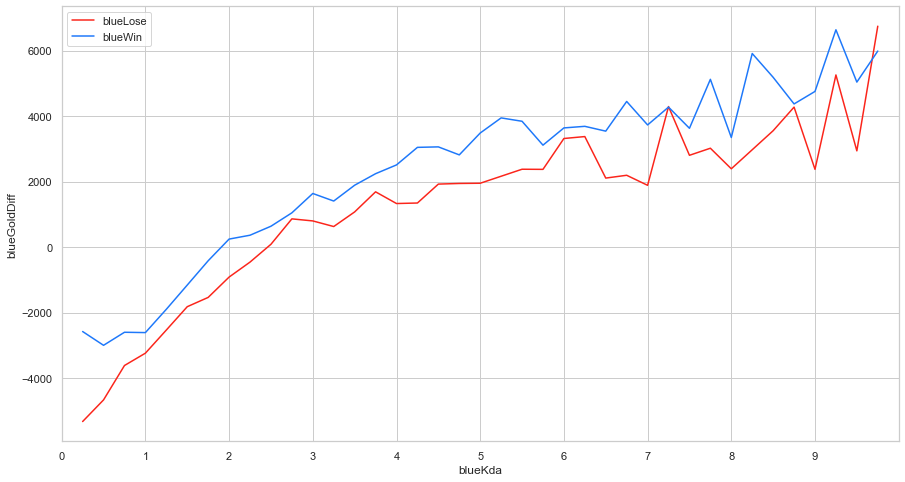

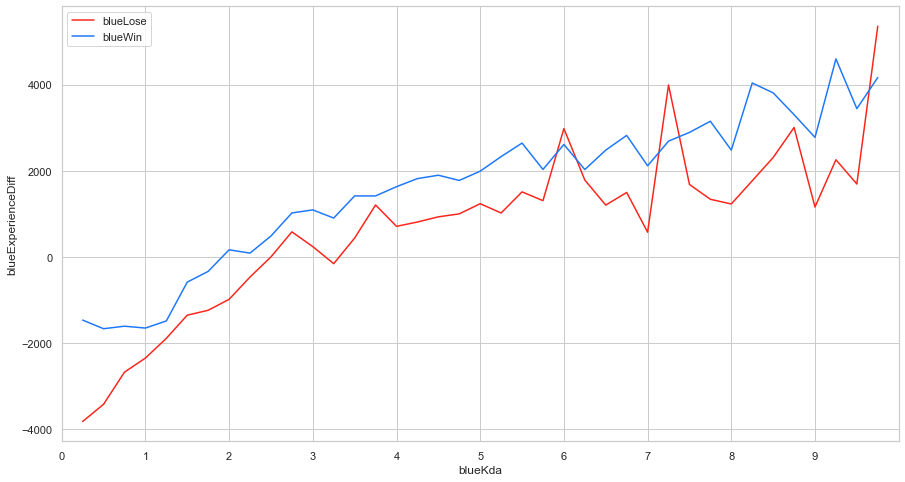

In [184]:
data_show = data_rf_blue['blueWins']==1
data_show_blue_win = data_rf_blue[data_show]
data_show = data_show.apply(lambda x: not x)
data_show_blue_lose = data_rf_blue[data_show]

def make_interval_mean(col1,col2,df_data,value_arange=[0, 10, 0.25]):
  df_temp = df_data.groupby([col1], as_index=False)[col2].mean()
  bins = list(np.arange(value_arange[0], value_arange[1], value_arange[2]))

  df_temp[col1] =pd.cut(df_temp[col1],bins)
  df_temp = df_temp.groupby([col1], as_index=False)[col2].mean()
  df_temp[col1]=df_temp[col1].apply(lambda x : x.right)
  return df_temp

data_gold_kda_win = make_interval_mean('blueKda','blueGoldDiff',data_show_blue_win,[0,10,0.25])
data_gold_kda_lose = make_interval_mean('blueKda','blueGoldDiff',data_show_blue_lose,[0,10,0.25])

plt.figure(figsize=((15,8)))
sns.lineplot(data = data_gold_kda_lose,x='blueKda',y='blueGoldDiff',color='#FB251B', label='blueLose')
sns.lineplot(data = data_gold_kda_win,x='blueKda',y='blueGoldDiff', color='#1E78FA', label='blueWin')
plt.xlim([0,10])
plt.xticks(np.arange(0,10))
plt.show()

data_exp_kda_win= make_interval_mean('blueKda','blueExperienceDiff',data_show_blue_win,[0,10,0.25])
data_exp_kda_lose = make_interval_mean('blueKda','blueExperienceDiff',data_show_blue_lose,[0,10,0.25])

plt.figure(figsize=((15,8)))
sns.lineplot(data = data_exp_kda_lose,x='blueKda',y='blueExperienceDiff',color='#FB251B', label='blueLose')
sns.lineplot(data = data_exp_kda_win,x='blueKda',y='blueExperienceDiff', color='#1E78FA', label='blueWin')
plt.xlim([0,10])
plt.xticks(np.arange(0,10))
plt.legend()
plt.show()
